In [1]:
import sys
import math
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

Exercise 1 - Create and display this simple network using networkx functions  

<img src="./images/exercise-0.png" alt="Drawing" align="left" style="width: 600px" />

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

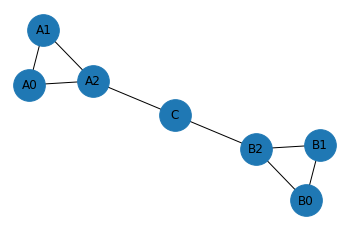

In [2]:
# Exercise 1 

# Create the graph 
graph = nx.Graph()

# Create the nodes
graph.add_node('A0')
graph.add_node('A1')
graph.add_node('A2')
graph.add_node('B0')
graph.add_node('B1')
graph.add_node('B2')
graph.add_node('C')

# Create the links
graph.add_edge('A0', 'A1')
graph.add_edge('A0', 'A2')
graph.add_edge('A1', 'A2')

graph.add_edge('B0', 'B1')
graph.add_edge('B0', 'B2')
graph.add_edge('B1', 'B2')

graph.add_edge('C', 'A2')
graph.add_edge('C', 'B2')

# Specify a graph layout 
pos = nx.spring_layout(graph, iterations=100)

# Add the node labels
nx.draw_networkx_labels(graph, pos)

# Draw the graph
nx.draw(graph, pos=pos, node_size=1000)

{'A0': 0.3333333333333333, 'A1': 0.3333333333333333, 'A2': 0.5, 'B0': 0.3333333333333333, 'B1': 0.3333333333333333, 'B2': 0.5, 'C': 0.3333333333333333}


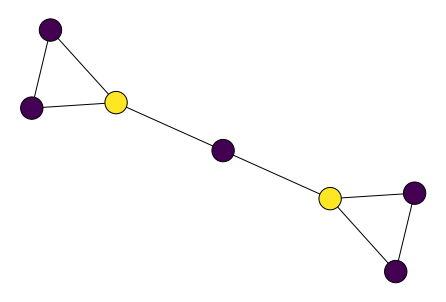

In [3]:
# Exercise 2 - Modify your visualization from Exercise 1 to display a centrality measure (e.g. degree centrality) 
# color and/or size the nodes based on that measure

# use a centrality measure...
dc = nx.degree_centrality(graph)
#dc = nx.betweenness_centrality(graph)
#dc = nx.closeness_centrality(graph)
#dc = nx.eigenvector_centrality(graph)
print(dc)

ds = np.array(list(dc.values()))
df = graph.size() * ds
nx.draw(graph, pos=pos, cmap='viridis', node_size=500, node_color=df, edgecolors='black', linewidths=1)
plt.show()


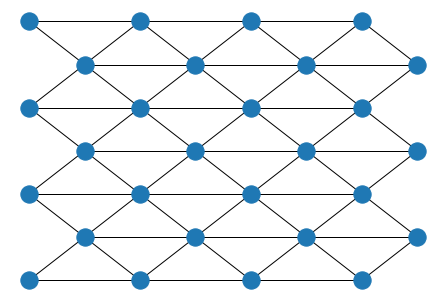

In [4]:
# Exercise 3 - NetworkX also has a number of built in generated graphs
# Review the list of networkx - select one - create and display it
# See: https://networkx.github.io/documentation/stable/reference/generators.html

# Some graphs will generate positions for you when you create them (so no need for a layout)

# Just pick something from the list - I'm choosing a triangular_lattice_graph
# Choosing to have the grenerator produce position data
graph = nx.triangular_lattice_graph(6,6,with_positions=True)

# Get the position attribute from each node - no need for a layout in this case
pos = graph.nodes.data('pos')

# Each node as a pos attribute with the position defined
nx.draw(graph, pos=pos)

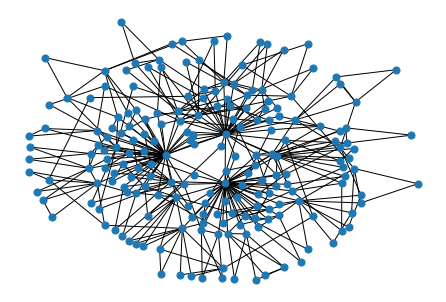

In [5]:
# Exercise 3 (Doing another one...) - NetworkX also has a number of built in generated graphs
# Review the list of networkx - select one - create and display it
# See: https://networkx.github.io/documentation/stable/reference/generators.html

# Some graphs will generate positions for you when you create them (so no need for a layout)

# Just pick something from the list
n = 200 
m = 2 
p = 0.9
graph = nx.powerlaw_cluster_graph(n, m, p)

#pos = nx.spring_layout(graph, iterations=1000)
pos = nx.kamada_kawai_layout(graph)

# Each node as a pos attribute with the position defined
nx.draw(graph, pos=pos, node_size=50)

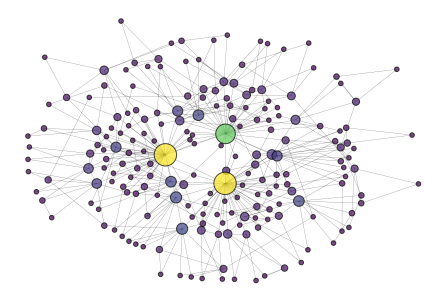

In [6]:
# Exercise 4 - Using the graph you generated in exercise 3 - explore various visualization options for the graph

# See layout schemes here: https://networkx.github.io/documentation/stable/reference/drawing.html (Under Graph Layouts)
pos = nx.kamada_kawai_layout(graph)

# use a centrality measure...
dc = nx.degree_centrality(graph)
#dc = nx.betweenness_centrality(graph)
#dc = nx.closeness_centrality(graph)
#dc = nx.eigenvector_centrality(graph, max_iter=1000)

# scaling of centrality
ds = np.array(list(dc.values()))
ds_max = np.max(ds)
ds = ds / ds_max

# base alpha
alpha = 0.7

# base edge width
wd = 0.2

# scale node size between min and max 
max_ns_scalar = 500
min_ns_scalar = 5 
max_ns = max_ns_scalar * ds
min_ns = np.full(max_ns.shape, min_ns_scalar)
ns = np.maximum(max_ns, min_ns)

# Each node as a pos attribute with the position defined
nx.draw(graph, pos=pos, alpha=alpha, width=wd, cmap='viridis', node_size=ns, node_color=ds, edgecolors='black')


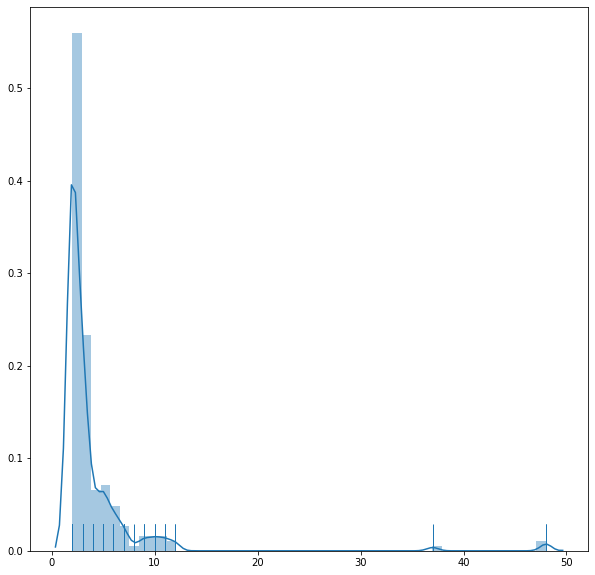

In [7]:
# Exercise 5 - create a histogram and/or kdeplot of degrees for the graph you generated in Exercise 4
# get the tuple of degrees [(node,deg)...]

# matplotlib - create a larger canvas
plt.rcParams['figure.figsize'] = (10,10)
deg_list = graph.degree
degs = [deg for nd, deg in deg_list]
sns.distplot(degs, rug=True)

In [8]:
# Exercise 6 (More Advanced)  

# Use the data in data/airport-0.xlsx and data/flights-1.xlsx to build network
# visualizations for a real airline transportation network

# The airports data provides the nodes
# The flights data provide the links between nodes

# Note: A solution is provided in airline-network-2.ipynb file  

# Note that there are two layouts used: 
# First visualization: fruchterman_reingold_layout 
# Second visualization: uses a custom layout where the positions are get by the geographic location of each airport

<img src="./results/airline-network-0.png" alt="drawing" align="left" style="width: 600px" />

<img src="./images/div-0.png" alt="Drawing" align="left" style="width: 800px" />

<img src="./results/airline-network-1.png" alt="Drawing" align="left" style="width: 700px" />